In [378]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import set_option
import seaborn as sns
LARGE_FIGSIZE = (18, 6)
pd.set_option('display.max_rows', 10)

In [405]:
full_data = pd.read_table('Diabetes-Data/data-70', index_col=0, parse_dates=[[0,1]], names= ['date', 'time', 'code', 'value'])
full_data.info()
full_data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 341 entries, 1989-03-13 08:00:00 to 1989-05-12 08:00:00
Data columns (total 2 columns):
code     341 non-null int64
value    341 non-null float64
dtypes: float64(1), int64(1)
memory usage: 8.0 KB


,code,value
date_time,,
1989-03-13 08:00:00,58,354.0
1989-03-13 08:00:00,33,2.0
1989-03-13 08:00:00,34,8.0
1989-03-13 18:00:00,62,275.0
1989-03-13 18:00:00,33,1.0
...,...,...
1989-05-09 08:00:00,33,1.0
1989-05-09 08:00:00,34,7.0
1989-05-10 08:00:00,34,7.0


In [386]:
pd.isnull(full_data).sum()

code     0
value    0
dtype: int64

In [387]:
# selecting smaller time frame to make the plots simpler
month = pd.to_datetime('1989-06-01')
a = full_data.index < month
data = full_data[a]


In [388]:
labels = pd.read_table('/Users/surajjoshi/UCSF_Pancreas/diabetes_labels.csv', sep=',',names= ['code', 'Title'])

In [389]:
lst = data['code'].unique()
lst

array([58, 33, 34, 62, 48, 60])

In [390]:
a = labels[labels['code'] == 33] 

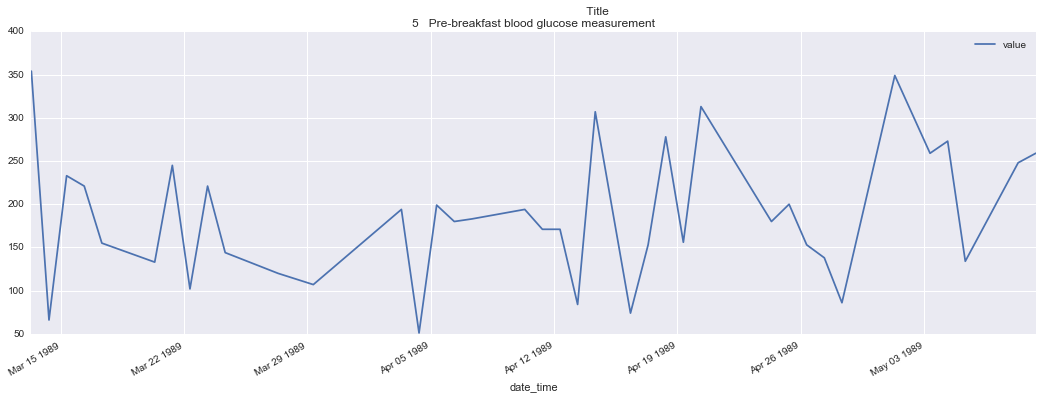

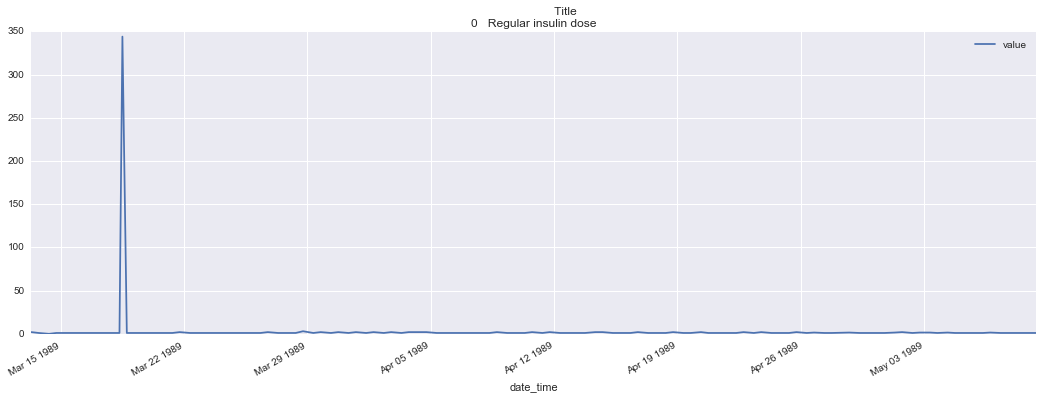

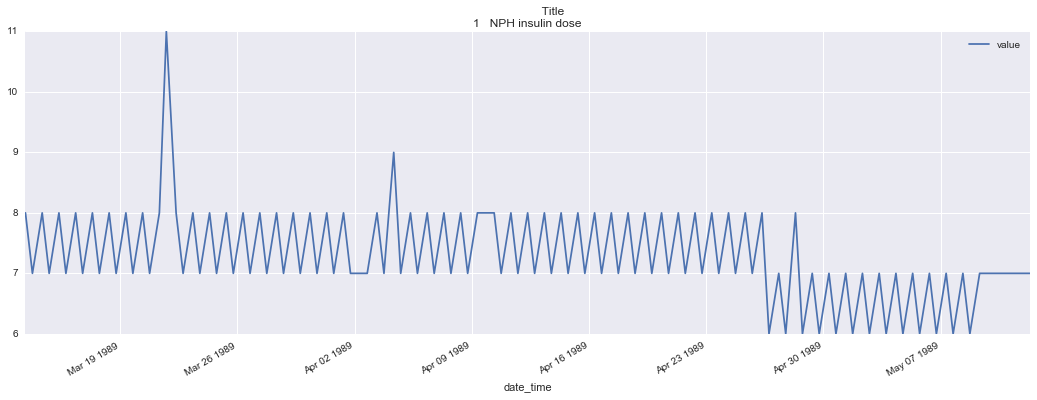

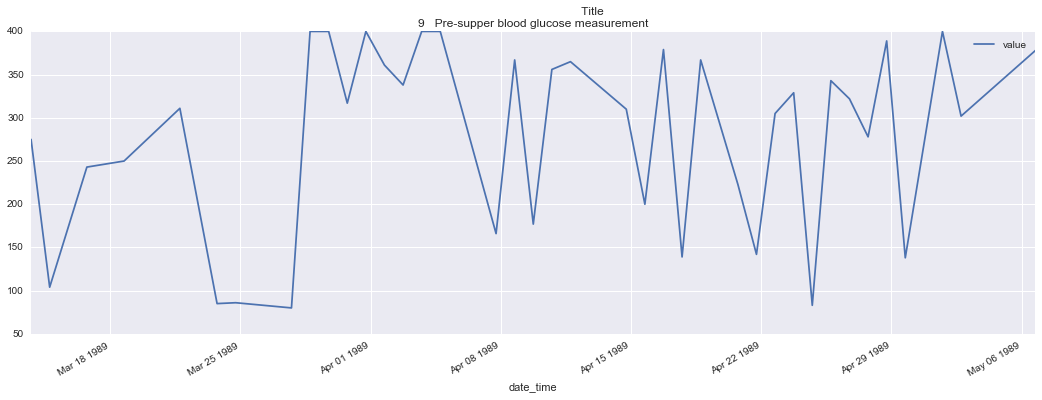

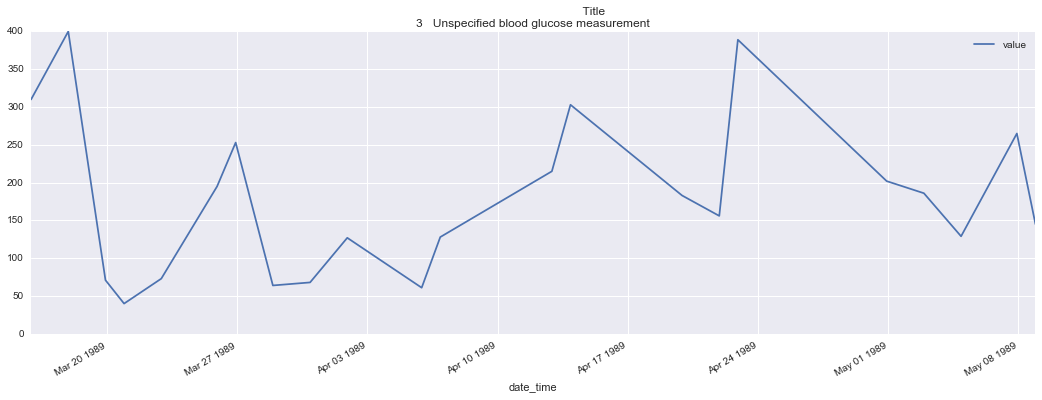

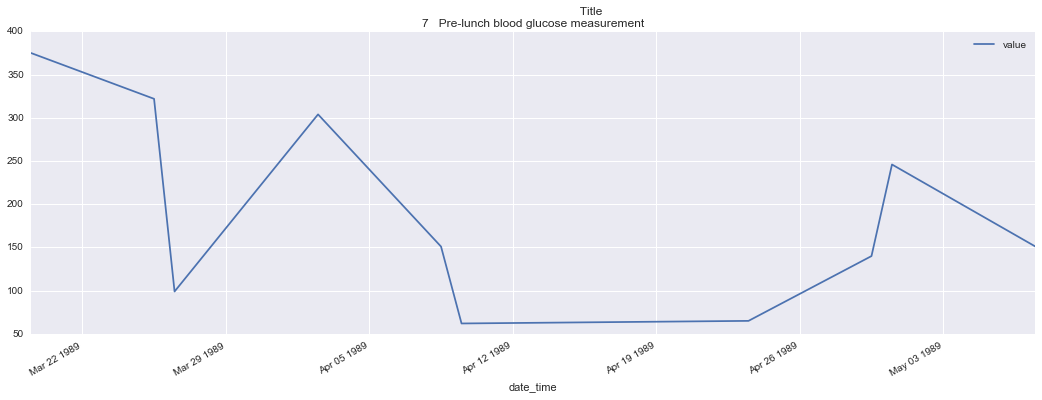

In [391]:
for i in lst:
    hr_mask = data['code'] ==i
    hr = data.loc[hr_mask, ['value']]
    a = labels[labels['code'] == i]
    hr.plot(figsize=LARGE_FIGSIZE, label = a[[1]])
#     hr.plot(kind="kde", figsize=LARGE_FIGSIZE, label = a[[1]], subplots=True)
    plt.title(a[[1]])
    plt.legend(loc='upper right')
    


In [392]:
# full_data

In [393]:
# data = data.reset_index()
# data

In [394]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 341 entries, 1989-03-13 08:00:00 to 1989-05-12 08:00:00
Data columns (total 2 columns):
code     341 non-null int64
value    341 non-null float64
dtypes: float64(1), int64(1)
memory usage: 8.0 KB


In [395]:
# full_data = full_data.reset_index()
# # full_data.info()
# # full_data
# full_data['days'] = pd.to_numeric(full_data['date_time']).apply(int)/3600000000000000
# # mean_sea_level["year"] = mean_sea_level["date"].apply(int)
# # grouped_full_data = full_data.groupby(int)
# full_data

In [396]:
# data['days'] = pd.to_numeric(data['date_time']).apply(int)/1000000000000
# mean_sea_level["year"] = mean_sea_level["date"].apply(int)
# data
data_grouped = full_data.groupby("code")

In [397]:
data_grouped.mean()

,value
code,
33,4.241228
34,7.322034
48,180.136364
58,186.526316
60,191.500000
62,279.692308


In [398]:
data_grouped.std()

,value
code,
33,32.106035
34,0.749716
48,105.028021
58,77.476670
60,112.343966
62,108.616456


In [399]:
data_grouped.mean()
# data_grouped.aggregate({"value": np.mean})

,value
code,
33,4.241228
34,7.322034
48,180.136364
58,186.526316
60,191.500000
62,279.692308


In [400]:
for group_name, sub_df in data_grouped:
    print (group_name)
    print 'Mean : ', sub_df.mean()
    print (' ')

33
Mean :  code     33.000000
value     4.241228
dtype: float64
 
34
Mean :  code     34.000000
value     7.322034
dtype: float64
 
48
Mean :  code      48.000000
value    180.136364
dtype: float64
 
58
Mean :  code      58.000000
value    186.526316
dtype: float64
 
60
Mean :  code      60.0
value    191.5
dtype: float64
 
62
Mean :  code      62.000000
value    279.692308
dtype: float64
 
